In [1]:
# Create Latitude and Longitude Combinations

# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the datetime module from the datetime library.
from datetime import datetime



In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# 6.1.5 Generate Random World Cities
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

592

In [5]:
############################################ 6.2.6 Get the City Weather Data ############################################
# Import your Requests Library and the weather_api_key
from config import weather_api_key
import requests

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | leningradskiy
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | carberry
Processing Record 4 of Set 1 | geraldton
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | meulaboh
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | mme
City not found. Skipping...
Processing Record 10 of Set 1 | fortuna
Processing Record 11 of Set 1 | hudiksvall
Processing Record 12 of Set 1 | rumilly
Processing Record 13 of Set 1 | bargal
City not found. Skipping...
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | pemba
Processing Record 16 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | arraial do cabo
Processing Record 19 of Set 1 | koubia
Processing Record 20 of Set 1 | busselton
Processing Record 

Processing Record 40 of Set 4 | ketchikan
Processing Record 41 of Set 4 | nemuro
Processing Record 42 of Set 4 | hammerfest
Processing Record 43 of Set 4 | kahului
Processing Record 44 of Set 4 | asau
Processing Record 45 of Set 4 | luena
Processing Record 46 of Set 4 | airai
Processing Record 47 of Set 4 | norman wells
Processing Record 48 of Set 4 | port alfred
Processing Record 49 of Set 4 | makakilo city
Processing Record 50 of Set 4 | vanimo
Processing Record 1 of Set 5 | matamoros
Processing Record 2 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 5 | naze
Processing Record 4 of Set 5 | guerrero negro
Processing Record 5 of Set 5 | tasiilaq
Processing Record 6 of Set 5 | ilesha
Processing Record 7 of Set 5 | ahipara
Processing Record 8 of Set 5 | gouyave
Processing Record 9 of Set 5 | bambous virieux
Processing Record 10 of Set 5 | dubrovnik
Processing Record 11 of Set 5 | tigre
Processing Record 12 of Set 5 | aksu
Processing Record 13 of Set 5 | k

Processing Record 38 of Set 8 | meyungs
City not found. Skipping...
Processing Record 39 of Set 8 | lubana
Processing Record 40 of Set 8 | oranjemund
Processing Record 41 of Set 8 | pilar
Processing Record 42 of Set 8 | lima
Processing Record 43 of Set 8 | kodinsk
Processing Record 44 of Set 8 | svetlaya
Processing Record 45 of Set 8 | aksarka
Processing Record 46 of Set 8 | ulaangom
Processing Record 47 of Set 8 | prado
Processing Record 48 of Set 8 | port hedland
Processing Record 49 of Set 8 | vanavara
Processing Record 50 of Set 8 | xining
Processing Record 1 of Set 9 | lodja
Processing Record 2 of Set 9 | iqaluit
Processing Record 3 of Set 9 | thinadhoo
Processing Record 4 of Set 9 | maldonado
Processing Record 5 of Set 9 | amderma
City not found. Skipping...
Processing Record 6 of Set 9 | saint-pierre
Processing Record 7 of Set 9 | touros
Processing Record 8 of Set 9 | pangnirtung
Processing Record 9 of Set 9 | inuvik
Processing Record 10 of Set 9 | vikulovo
Processing Record 11 

Processing Record 28 of Set 12 | santa maria
Processing Record 29 of Set 12 | walla walla
Processing Record 30 of Set 12 | varhaug
Processing Record 31 of Set 12 | dhidhdhoo
Processing Record 32 of Set 12 | phan rang
City not found. Skipping...
Processing Record 33 of Set 12 | pierre
Processing Record 34 of Set 12 | kosai
Processing Record 35 of Set 12 | yulara
Processing Record 36 of Set 12 | kiunga
Processing Record 37 of Set 12 | santa cruz del sur
Processing Record 38 of Set 12 | puerto carreno
Processing Record 39 of Set 12 | barao de melgaco
Processing Record 40 of Set 12 | haibowan
City not found. Skipping...
Processing Record 41 of Set 12 | tual
Processing Record 42 of Set 12 | puerto escondido
-----------------------------
Data Retrieval Complete      
-----------------------------


In [6]:
print(len(city_data))

548


In [7]:
#############################  6.2.7 - Create a DataFrame of City Weather Data  #############################
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Leningradskiy,69.38,178.42,38.61,88,100,9.40,RU,2020-08-02 19:59:43
1,Mataura,-46.19,168.86,47.10,95,96,2.26,NZ,2020-08-02 19:59:43
2,Carberry,49.87,-99.36,73.40,46,75,8.05,CA,2020-08-02 19:59:43
3,Geraldton,-28.77,114.60,57.20,87,75,23.04,AU,2020-08-02 19:59:43
4,Lebu,-37.62,-73.65,55.40,85,38,8.32,CL,2020-08-02 19:59:43
5,Meulaboh,4.14,96.13,76.93,84,100,3.71,ID,2020-08-02 19:59:43
6,Atuona,-9.80,-139.03,78.62,77,1,17.60,PF,2020-08-02 19:59:43
7,Vaini,-21.20,-175.20,73.40,88,75,9.17,TO,2020-08-02 19:59:43
8,Fortuna,40.60,-124.16,70.00,73,6,3.00,US,2020-08-02 19:59:43
9,Hudiksvall,61.73,17.10,64.00,85,83,2.80,SE,2020-08-02 19:59:43


In [8]:
# reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Leningradskiy,RU,2020-08-02 19:59:43,69.38,178.42,38.61,88,100,9.40
1,Mataura,NZ,2020-08-02 19:59:43,-46.19,168.86,47.10,95,96,2.26
2,Carberry,CA,2020-08-02 19:59:43,49.87,-99.36,73.40,46,75,8.05
3,Geraldton,AU,2020-08-02 19:59:43,-28.77,114.60,57.20,87,75,23.04
4,Lebu,CL,2020-08-02 19:59:43,-37.62,-73.65,55.40,85,38,8.32
5,Meulaboh,ID,2020-08-02 19:59:43,4.14,96.13,76.93,84,100,3.71
6,Atuona,PF,2020-08-02 19:59:43,-9.80,-139.03,78.62,77,1,17.60
7,Vaini,TO,2020-08-02 19:59:43,-21.20,-175.20,73.40,88,75,9.17
8,Fortuna,US,2020-08-02 19:59:43,40.60,-124.16,70.00,73,6,3.00
9,Hudiksvall,SE,2020-08-02 19:59:43,61.73,17.10,64.00,85,83,2.80


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

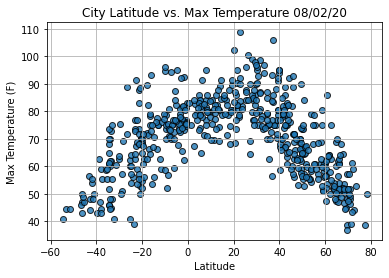

In [11]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

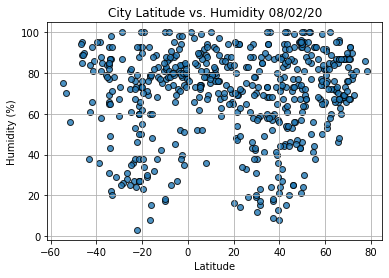

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

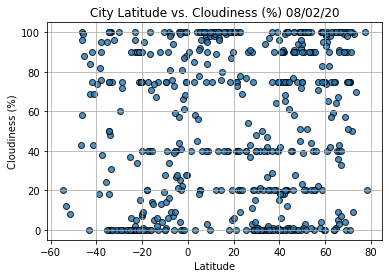

In [13]:
#############################  6.3.3 - Plot Latitude vs. Cloudiness  #############################  

# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


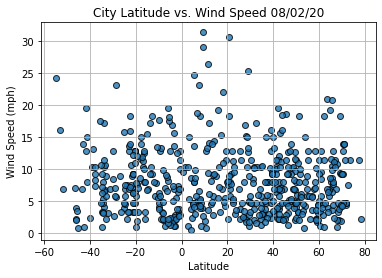

In [14]:
#############################  6.3.4 - Plot Latitude vs. Wind Speed  #############################  
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [15]:
##########################  6.4.2 - Find the Correlation Between Latitude and Maximum Temperature  ##########################
# Create a Linear Regression Function

from scipy.stats import linregress
import matplotlib.pyplot as plt

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()


In [16]:
# Create the Hemisphere DataFrames
index13 = city_data_df.loc[13]
index13

City              Arraial Do Cabo
Country                        BR
Date          2020-08-02 19:59:44
Lat                        -22.97
Lng                        -42.03
Max Temp                     73.4
Humidity                       53
Cloudiness                      2
Wind Speed                  12.75
Name: 13, dtype: object

In [17]:
# get all Northern Hemisphere latitudes, for latitudes greater than or equal to 0
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4      False
       ...  
543     True
544     True
545    False
546    False
547     True
Name: Lat, Length: 548, dtype: bool

In [18]:
# for latitudes greater than or equal to 0
city_data_df.loc[(city_data_df["Lat"] >= 0)].head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Leningradskiy,RU,2020-08-02 19:59:43,69.38,178.42,38.61,88,100,9.40
2,Carberry,CA,2020-08-02 19:59:43,49.87,-99.36,73.40,46,75,8.05
5,Meulaboh,ID,2020-08-02 19:59:43,4.14,96.13,76.93,84,100,3.71
8,Fortuna,US,2020-08-02 19:59:43,40.60,-124.16,70.00,73,6,3.00
9,Hudiksvall,SE,2020-08-02 19:59:43,61.73,17.10,64.00,85,83,2.80


In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

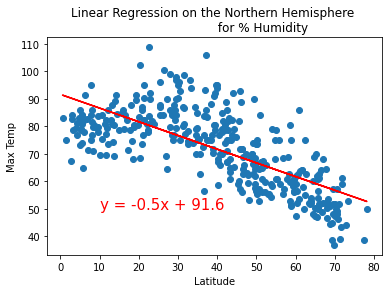

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n \
                        for % Humidity', 'Max Temp',(10,50))

In [36]:
linregress(y_values,x_values)

LinregressResult(slope=-1.0107765246910292, intercept=112.34909450413883, rvalue=-0.7093145995406276, pvalue=3.573126821611565e-56, stderr=0.05316242107995888)

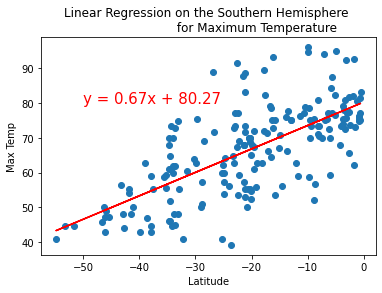

In [28]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n \
                        for Maximum Temperature', 'Max Temp',(-50,80))

########################################################## FINDINGS ##########################################################
# The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less 
# than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means
# that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the 
# temperatures become cooler. Check the r-values for your plots. 

In [32]:
from scipy.stats import linregress
import matplotlib.pyplot as plt
linregress(y_values,x_values)

LinregressResult(slope=0.6979026069924137, intercept=-66.79501771447296, rvalue=0.6859741251063616, pvalue=1.2688498303391877e-27, stderr=0.054134540226856674)

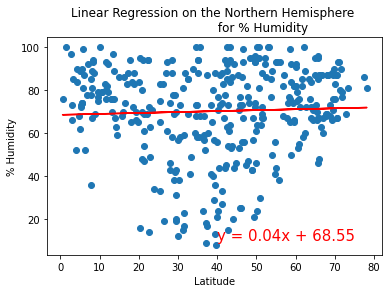

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n \
                        for % Humidity', '% Humidity',(40,10))

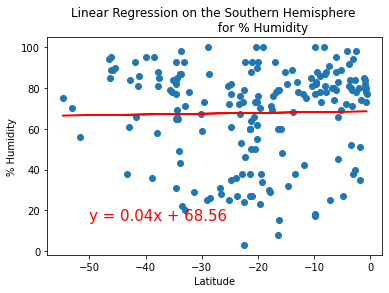

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n \
                        for % Humidity', '% Humidity',(-50,15))

########################################################## FINDINGS ##########################################################
# The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern 
# and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather 
# patterns that can increase or decrease percent humidity. Check the r-values for your plots. 

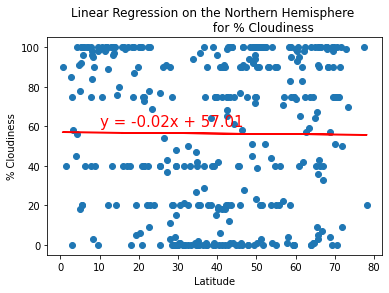

In [24]:
#######################  6.4.4 - Find the Correlation Between Latitude and Percent Cloudiness ####################### 
# SKILL DRILL - Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n \
                        for % Cloudiness', '% Cloudiness',(10,60))


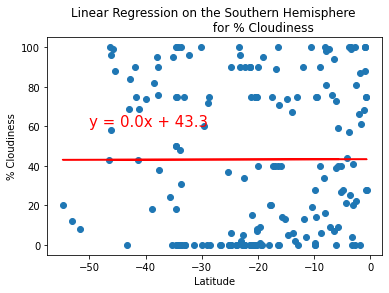

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n \
                        for % Cloudiness', '% Cloudiness',(-50,60))

########################################################## FINDINGS ##########################################################
# The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the 
# Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that cloudiness is 
# unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. Check the r-values for your 
# plots. 

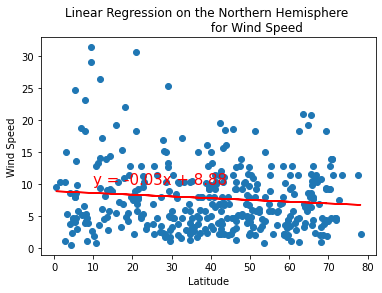

In [26]:
#######################  6.4.5 - Find the Correlation Between Latitude and Wind Speed #######################  

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n \
                        for Wind Speed', 'Wind Speed',(10,10))


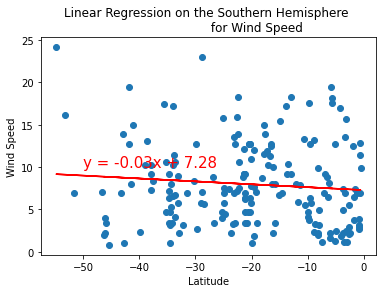

In [27]:
# Perform Linear Regression on the Wind Speed for the Southern Hemisphere
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n \
                        for Wind Speed', 'Wind Speed',(-50,10))

########################################################## FINDINGS ##########################################################
# The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the Northern 
# Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here . This means that wind speed is 
# unpredictable due to changing weather patterns that can increase or decrease wind speed. Check the r-values for your plots. 